##CLEAN AND TEST DATA

In [13]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
df=pd.read_csv("/content/Ford_ARIMA.csv")

In [21]:
df.head()

,Date,PX_LAST
0,2010-11-01,16.2225
1,2010-12-01,16.7800
2,2011-01-01,17.7850
3,2011-02-01,15.7350
4,2011-03-01,14.5700


In [22]:
df.tail()

,Date,PX_LAST
148,2023-03-01,12.1180
149,2023-04-01,12.1350
150,2023-05-01,11.8500
151,2023-06-01,13.9400
152,2023-07-01,14.2875


In [23]:
## Cleaning data
df.columns=["Month","Rate"]
df.head()

,Month,Rate
0,2010-11-01,16.2225
1,2010-12-01,16.7800
2,2011-01-01,17.7850
3,2011-02-01,15.7350
4,2011-03-01,14.5700


In [24]:
df.tail()

,Month,Rate
148,2023-03-01,12.1180
149,2023-04-01,12.1350
150,2023-05-01,11.8500
151,2023-06-01,13.9400
152,2023-07-01,14.2875


In [25]:
# Convert Month into DateFormat
df['Month'] = pd.to_datetime(df['Month'])

In [26]:
df

,Month,Rate
0,2010-11-01,16.2225
1,2010-12-01,16.7800
2,2011-01-01,17.7850
3,2011-02-01,15.7350
4,2011-03-01,14.5700
...,...,...
148,2023-03-01,12.1180
149,2023-04-01,12.1350
150,2023-05-01,11.8500
151,2023-06-01,13.9400


In [27]:
df.set_index('Month',inplace=True)

In [28]:
df.head()

,Rate
Month,
2010-11-01,16.2225
2010-12-01,16.7800
2011-01-01,17.7850
2011-02-01,15.7350
2011-03-01,14.5700


In [29]:
df.tail()

,Rate
Month,
2023-03-01,12.1180
2023-04-01,12.1350
2023-05-01,11.8500
2023-06-01,13.9400
2023-07-01,14.2875


In [30]:
df.describe()

,Rate
count,153.000000
mean,12.613229
std,3.057931
min,4.900000
25%,10.572500
50%,12.526000
75%,14.947500
max,22.455000


<Axes: xlabel='Month'>

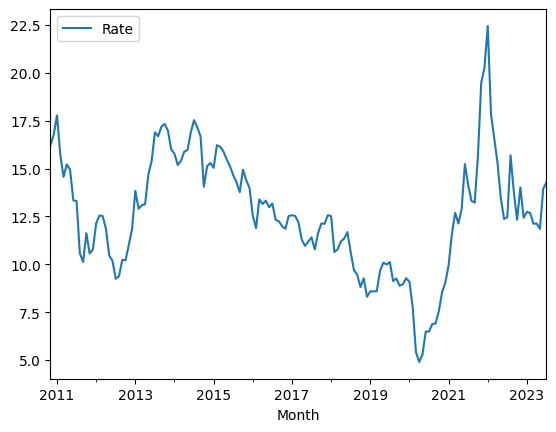

In [31]:
df.plot()

## Testing For Stationarity

In [32]:
from statsmodels.tsa.stattools import adfuller

In [33]:
test_result=adfuller(df['Rate'])

In [34]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Rate):
    result=adfuller(Rate)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis.Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [35]:
adfuller_test(df['Rate'])

ADF Test Statistic : -2.680476503083977
p-value : 0.07747804548411097
#Lags Used : 1
Number of Observations Used : 151
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


##DIFFERENCING

In [63]:
df['Rates First Difference'] = df['Rate'] - df['Rate'].shift(1)

In [64]:
df['Rate'].shift(1)

Month
2010-11-01        NaN
2010-12-01    16.2225
2011-01-01    16.7800
2011-02-01    17.7850
2011-03-01    15.7350
               ...   
2023-03-01    12.6825
2023-04-01    12.1180
2023-05-01    12.1350
2023-06-01    11.8500
2023-07-01    13.9400
Name: Rate, Length: 153, dtype: float64

In [69]:
df['Rates First Difference'] = df['Rate'] - df['Rate'].shift(4)  ##Quarterly  shift for 4 months

In [70]:
df.head(14)

,Rate,Rates First Difference
Month,,
2010-11-01,16.2225,NaN
2010-12-01,16.7800,NaN
2011-01-01,17.7850,NaN
2011-02-01,15.7350,NaN
2011-03-01,14.5700,-1.6525
2011-04-01,15.2200,-1.5600
2011-05-01,14.9475,-2.8375
2011-06-01,13.3425,-2.3925
2011-07-01,13.3020,-1.2680


In [71]:
## Again test dickey fuller test
adfuller_test(df['Rates First Difference'].dropna())

ADF Test Statistic : -3.1023362174934275
p-value : 0.026380780322677662
#Lags Used : 12
Number of Observations Used : 136
strong evidence against the null hypothesis(Ho), reject the null hypothesis.Data has no unit root and is stationary


<Axes: xlabel='Month'>

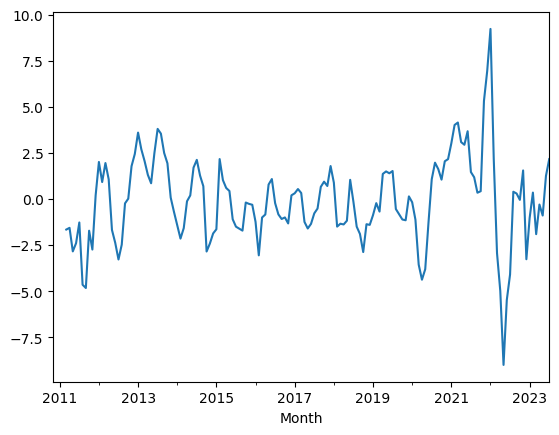

In [72]:
df['Rates First Difference'].plot()

##DETERMINING p (AR) ,d (diff), q (MA)
p- partial auto-correlation
q- auto-correlation

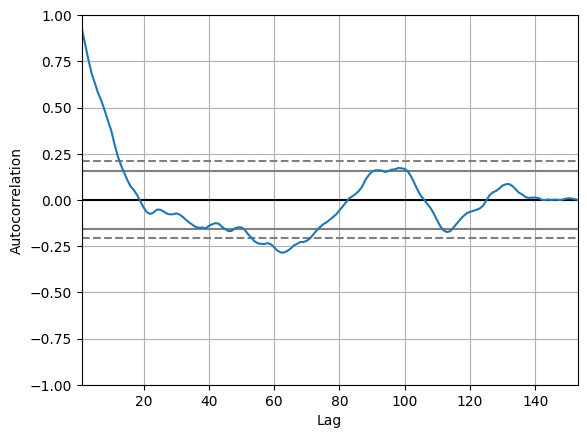

In [73]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Rate'])
plt.show()

In [74]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

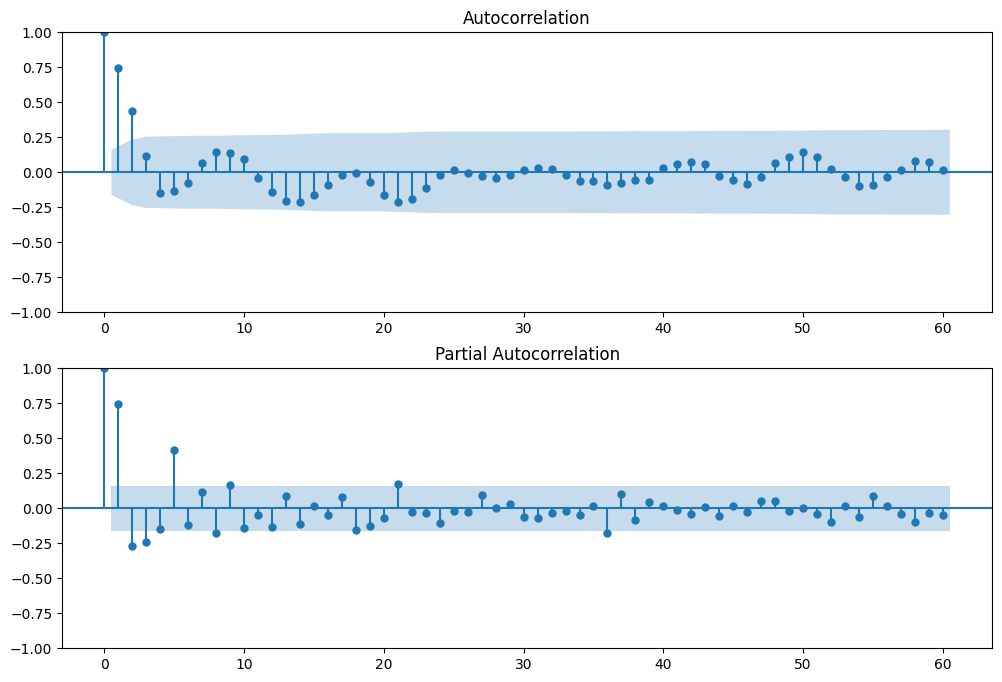

In [75]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Rates First Difference'].iloc[5:],lags=60,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Rates First Difference'].iloc[5:],lags=60,ax=ax2)

##Building ARIMA
p=1, d=1, q=2 or 3

In [76]:
# For non-seasonal data

from statsmodels.tsa.arima.model import ARIMA

In [118]:
model=ARIMA(df['Rate'],order=(1,1,2))
model_fit=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [119]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Rate   No. Observations:                  153
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -227.379
Date:                Sun, 20 Aug 2023   AIC                            462.759
Time:                        22:35:13   BIC                            474.854
Sample:                    11-01-2010   HQIC                           467.672
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0469      8.846      0.005      0.996     -17.292      17.385
ma.L1          0.0595      8.857      0.007      0.995     -17.301      17.420
ma.L2          0.0018      0.954      0.002      0.998      -1.869       1.872
sigma2         1.1663      0.102     11.387      0.000       0.966       1.367
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                56.65
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.03   Skew:                            -0.27
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

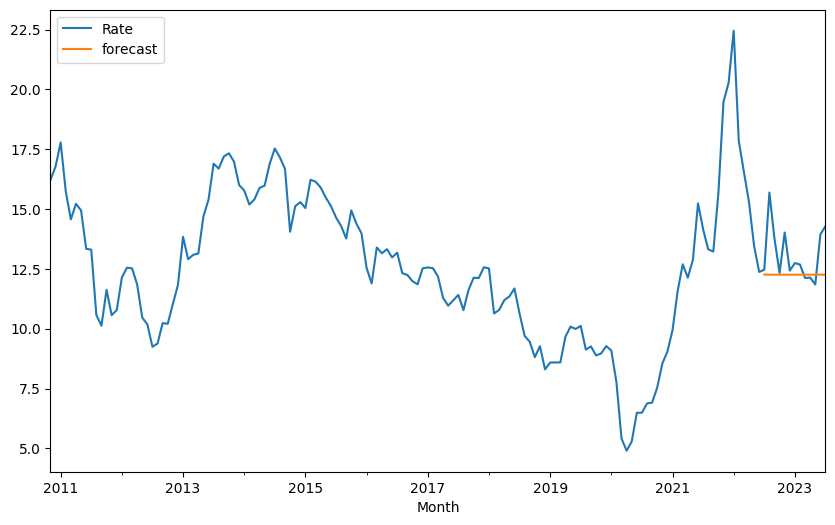

In [131]:
df['forecast']=model_fit.predict(start=140,end=153,dynamic=True)
df[['Rate','forecast']].plot(figsize=(10,6))

In [121]:
import statsmodels.api as sm

In [122]:
model=sm.tsa.statespace.SARIMAX(df['Rate'],order=(1, 1, 2),seasonal_order=(1,1,2,4))
results=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Month'>

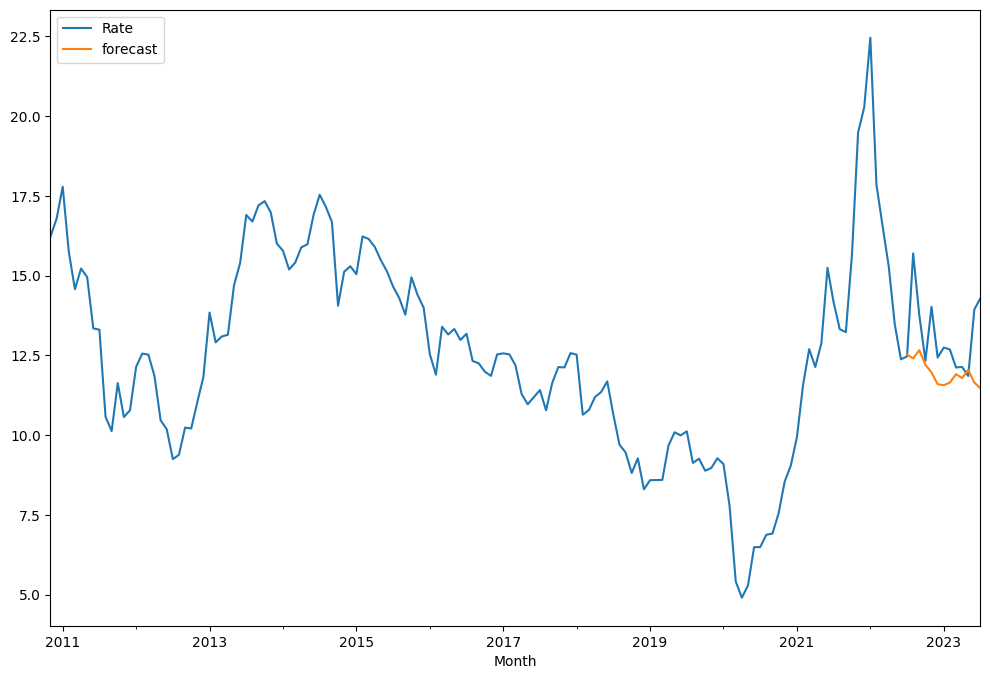

In [130]:
df['forecast']=results.predict(start=140,end=153,dynamic=True)
df[['Rate','forecast']].plot(figsize=(12,8))

In [132]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [133]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [134]:
future_datest_df.tail()

,Rate,Rates First Difference,forecast
2025-02-01,NaN,NaN,NaN
2025-03-01,NaN,NaN,NaN
2025-04-01,NaN,NaN,NaN
2025-05-01,NaN,NaN,NaN
2025-06-01,NaN,NaN,NaN


In [135]:
future_df=pd.concat([df,future_datest_df])

##Quaterly FORECAST

<Axes: >

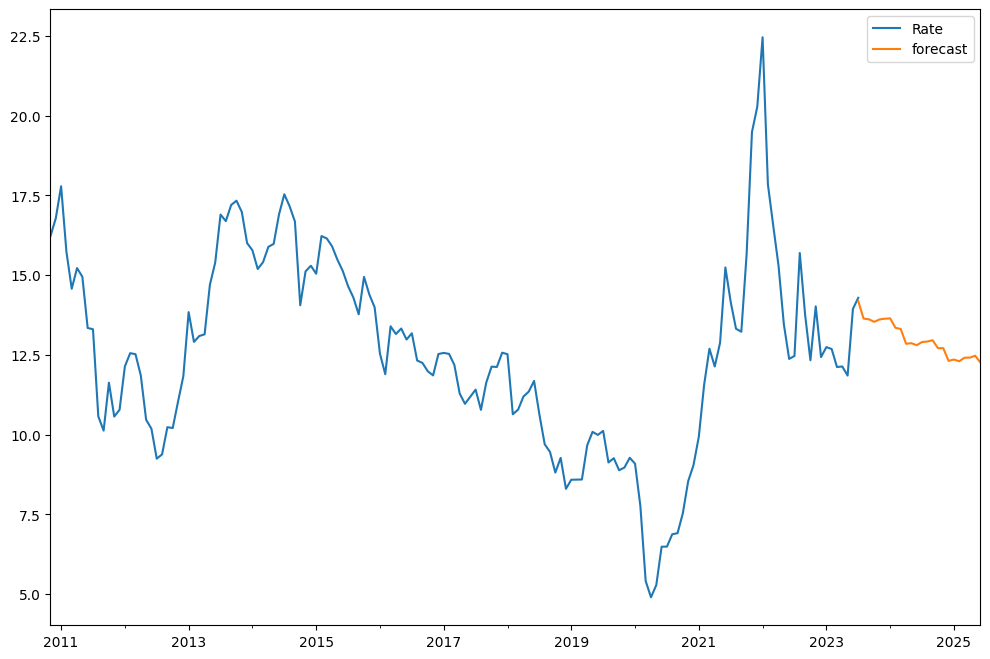

In [136]:
future_df['forecast'] = results.predict(start = 152, end = 175, dynamic= True)
future_df[['Rate', 'forecast']].plot(figsize=(12, 8))